In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
calendar_events = pd.read_csv('../../data/raw/calendar_events.csv',low_memory=False)

In [3]:
calendar = pd.read_csv('../../data/raw/calendar.csv',low_memory=False)

In [4]:
items_weekly_sell_prices = pd.read_csv('../../data/raw/items_weekly_sell_prices.csv',low_memory=False)

In [5]:
sales_train = pd.read_csv('../../data/raw/sales_train.csv',low_memory=False)

In [6]:
calendar_events

,date,event_name,event_type
0,2011-02-06,SuperBowl,Sporting
1,2011-02-14,ValentinesDay,Cultural
2,2011-02-21,PresidentsDay,National
3,2011-03-09,LentStart,Religious
4,2011-03-16,LentWeek2,Religious
...,...,...,...
162,2016-05-30,MemorialDay,National
163,2016-06-02,NBAFinalsStart,Sporting
164,2016-06-07,Ramadan starts,Religious
165,2016-06-19,Father's day,Cultural


In [7]:
items_weekly_sell_prices

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
...,...,...,...,...
6841116,WI_3,FOODS_3_827,11617,1.00
6841117,WI_3,FOODS_3_827,11618,1.00
6841118,WI_3,FOODS_3_827,11619,1.00
6841119,WI_3,FOODS_3_827,11620,1.00


In [8]:
sales_train

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1532,d_1533,d_1534,d_1535,d_1536,d_1537,d_1538,d_1539,d_1540,d_1541
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,1,0,1,0,1,0,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,8,2,0,8,2,3,1,1,3,8
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,0,1,3,2,1,1,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,1,2,0,0,0,1,0,0,0,2
30486,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,12,0,0,0
30487,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,1,0,3,2,1,1,0,1,3,0
30488,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Melt the DataFrame to reshape it
sales_train_melted = pd.melt(sales_train, id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'],
                    var_name='day', value_name='item_sales')

In [10]:
sales_train_melted.shape

(46985090, 8)

In [11]:
sales_train_melted

,id,item_id,dept_id,cat_id,store_id,state_id,day,item_sales
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
...,...,...,...,...,...,...,...,...
46985085,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,d_1541,2
46985086,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,d_1541,0
46985087,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,d_1541,0
46985088,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,d_1541,0


In [12]:
# Merge the two DataFrames based on the 'day' and 'd' columns
merged_df = sales_train_melted.merge(calendar[['d', 'date', 'wm_yr_wk']], left_on='day', right_on='d', how='left')

In [13]:
calendar_events = pd.DataFrame(calendar_events.groupby('date').size().reset_index(name='event_count'))

In [14]:
merged_df = merged_df.merge(calendar_events, on='date', how='left')

In [15]:
merged_df = merged_df.merge(items_weekly_sell_prices[['store_id', 'item_id', 'wm_yr_wk', 'sell_price']], 
                            on=['store_id', 'item_id', 'wm_yr_wk'], how='left')
merged_df

,id,item_id,dept_id,cat_id,store_id,state_id,day,item_sales,d,date,wm_yr_wk,event_count,sell_price
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,d_1,2011-01-29,11101,NaN,NaN
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,d_1,2011-01-29,11101,NaN,NaN
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,d_1,2011-01-29,11101,NaN,NaN
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,d_1,2011-01-29,11101,NaN,NaN
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,d_1,2011-01-29,11101,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46985085,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,d_1541,2,d_1541,2015-04-18,11512,NaN,2.88
46985086,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,d_1541,0,d_1541,2015-04-18,11512,NaN,2.00
46985087,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,d_1541,0,d_1541,2015-04-18,11512,NaN,3.98
46985088,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,d_1541,0,d_1541,2015-04-18,11512,NaN,1.28


In [16]:
# Drop columns as it's no longer needed
df = merged_df.drop(columns=['id','dept_id','cat_id','state_id','d','day','wm_yr_wk'])

In [17]:
df['is_event'] = (df['event_count'] > 0).astype(int)
df = df.drop('event_count', axis=1)

In [18]:
df

,item_id,store_id,item_sales,date,sell_price,is_event
0,HOBBIES_1_001,CA_1,0,2011-01-29,NaN,0
1,HOBBIES_1_002,CA_1,0,2011-01-29,NaN,0
2,HOBBIES_1_003,CA_1,0,2011-01-29,NaN,0
3,HOBBIES_1_004,CA_1,0,2011-01-29,NaN,0
4,HOBBIES_1_005,CA_1,0,2011-01-29,NaN,0
...,...,...,...,...,...,...
46985085,FOODS_3_823,WI_3,2,2015-04-18,2.88,0
46985086,FOODS_3_824,WI_3,0,2015-04-18,2.00,0
46985087,FOODS_3_825,WI_3,0,2015-04-18,3.98,0
46985088,FOODS_3_826,WI_3,0,2015-04-18,1.28,0


In [19]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
item_sales,46985090.0,1.086717,3.933200,0.00,0.00,0.00,1.00,763.00
sell_price,34720691.0,4.383804,3.358138,0.01,2.08,3.44,5.84,107.32
is_event,46985090.0,0.081765,0.274006,0.00,0.00,0.00,0.00,1.00


In [20]:
df['revenue'] = df['item_sales']*df['sell_price']
df['revenue'].fillna(0, inplace=True)
df['sell_price'].fillna(0, inplace=True)

In [21]:
df

,item_id,store_id,item_sales,date,sell_price,is_event,revenue
0,HOBBIES_1_001,CA_1,0,2011-01-29,0.00,0,0.00
1,HOBBIES_1_002,CA_1,0,2011-01-29,0.00,0,0.00
2,HOBBIES_1_003,CA_1,0,2011-01-29,0.00,0,0.00
3,HOBBIES_1_004,CA_1,0,2011-01-29,0.00,0,0.00
4,HOBBIES_1_005,CA_1,0,2011-01-29,0.00,0,0.00
...,...,...,...,...,...,...,...
46985085,FOODS_3_823,WI_3,2,2015-04-18,2.88,0,5.76
46985086,FOODS_3_824,WI_3,0,2015-04-18,2.00,0,0.00
46985087,FOODS_3_825,WI_3,0,2015-04-18,3.98,0,0.00
46985088,FOODS_3_826,WI_3,0,2015-04-18,1.28,0,0.00


In [22]:
(df['revenue'] == 0).sum()

33000385

In [23]:
revenue_zero = df['revenue'] != 0
df_cleaned = df[revenue_zero]
df_cleaned
# df_cleaned = df

,item_id,store_id,item_sales,date,sell_price,is_event,revenue
7,HOBBIES_1_008,CA_1,12,2011-01-29,0.46,0,5.52
8,HOBBIES_1_009,CA_1,2,2011-01-29,1.56,0,3.12
14,HOBBIES_1_015,CA_1,4,2011-01-29,0.70,0,2.80
15,HOBBIES_1_016,CA_1,5,2011-01-29,0.70,0,3.50
21,HOBBIES_1_022,CA_1,2,2011-01-29,6.86,0,13.72
...,...,...,...,...,...,...,...
46985082,FOODS_3_820,WI_3,6,2015-04-18,1.98,0,11.88
46985083,FOODS_3_821,WI_3,1,2015-04-18,4.98,0,4.98
46985084,FOODS_3_822,WI_3,1,2015-04-18,4.28,0,4.28
46985085,FOODS_3_823,WI_3,2,2015-04-18,2.88,0,5.76


In [24]:
df_cleaned = df_cleaned[df_cleaned['revenue']<=800]

In [25]:
df_cleaned.reset_index(inplace=True)
df_cleaned.drop('index', axis=1, inplace=True)

In [26]:
df_cleaned

,item_id,store_id,item_sales,date,sell_price,is_event,revenue
0,HOBBIES_1_008,CA_1,12,2011-01-29,0.46,0,5.52
1,HOBBIES_1_009,CA_1,2,2011-01-29,1.56,0,3.12
2,HOBBIES_1_015,CA_1,4,2011-01-29,0.70,0,2.80
3,HOBBIES_1_016,CA_1,5,2011-01-29,0.70,0,3.50
4,HOBBIES_1_022,CA_1,2,2011-01-29,6.86,0,13.72
...,...,...,...,...,...,...,...
13984639,FOODS_3_820,WI_3,6,2015-04-18,1.98,0,11.88
13984640,FOODS_3_821,WI_3,1,2015-04-18,4.98,0,4.98
13984641,FOODS_3_822,WI_3,1,2015-04-18,4.28,0,4.28
13984642,FOODS_3_823,WI_3,2,2015-04-18,2.88,0,5.76


In [27]:
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13984644 entries, 0 to 13984643
Data columns (total 7 columns):
 #   Column      Dtype         
---  ------      -----         
 0   item_id     object        
 1   store_id    object        
 2   item_sales  int64         
 3   date        datetime64[ns]
 4   sell_price  float64       
 5   is_event    int64         
 6   revenue     float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 746.9+ MB


In [28]:
# Extract the year, month, day and day of the week into new columns
df_cleaned['year'] = df_cleaned['date'].dt.year
df_cleaned['month'] = df_cleaned['date'].dt.month
df_cleaned['day'] = df_cleaned['date'].dt.day
df_cleaned['day_of_week'] = df_cleaned['date'].dt.strftime('%A')

In [29]:
col_list=['item_id','store_id','year','month','day','day_of_week','revenue']
final_df = df_cleaned[col_list]

In [30]:
final_df.shape

(13984644, 8)

In [31]:
final_df

,item_id,store_id,year,month,day_of_month,day_of_week,is_event,revenue
0,HOBBIES_1_008,CA_1,2011,1,29,Saturday,0,5.52
1,HOBBIES_1_009,CA_1,2011,1,29,Saturday,0,3.12
2,HOBBIES_1_015,CA_1,2011,1,29,Saturday,0,2.80
3,HOBBIES_1_016,CA_1,2011,1,29,Saturday,0,3.50
4,HOBBIES_1_022,CA_1,2011,1,29,Saturday,0,13.72
...,...,...,...,...,...,...,...,...
13984639,FOODS_3_820,WI_3,2015,4,18,Saturday,0,11.88
13984640,FOODS_3_821,WI_3,2015,4,18,Saturday,0,4.98
13984641,FOODS_3_822,WI_3,2015,4,18,Saturday,0,4.28
13984642,FOODS_3_823,WI_3,2015,4,18,Saturday,0,5.76


## Sampling

In [32]:
from sklearn.model_selection import train_test_split

# Specify the features (X) and target variable (y)
X = final_df[['item_id', 'store_id', 'year', 'month', 'day', 'day_of_week']]
y = final_df['revenue']

# Split the data into a 20% stratified sample
X_train, X_sample, y_train, y_sample = train_test_split(
    X, y, test_size=0.40, stratify=final_df[['day_of_week', 'month']], random_state=42
)

# The resulting X_sample and y_sample contain 20% of the data with stratification
# Create a new DataFrame 'final_df_sample' by concatenating 'X_sample' and 'y_sample'
final_df_sample = pd.concat([X_sample, y_sample], axis=1)

In [33]:
final_df_sample.reset_index(inplace=True)

In [34]:
final_df = final_df_sample.copy()

In [35]:
final_df.drop('index', axis=1, inplace=True)

In [36]:
final_df

,item_id,store_id,year,month,day_of_month,day_of_week,is_event,revenue
0,FOODS_3_757,CA_3,2014,8,10,Sunday,0,37.20
1,HOUSEHOLD_1_431,TX_3,2013,7,31,Wednesday,0,34.85
2,HOUSEHOLD_1_478,CA_1,2015,2,23,Monday,0,5.34
3,FOODS_3_503,CA_1,2013,8,16,Friday,0,24.80
4,FOODS_1_054,WI_2,2014,11,27,Thursday,1,1.98
...,...,...,...,...,...,...,...,...
5593853,FOODS_3_804,TX_2,2014,8,22,Friday,0,35.72
5593854,HOBBIES_1_394,WI_3,2013,10,5,Saturday,0,15.56
5593855,FOODS_3_807,WI_2,2012,6,25,Monday,0,7.92
5593856,FOODS_3_080,TX_1,2012,7,14,Saturday,0,23.70


In [37]:
# 14023073*100/47107050
# 13984644*100/47107050
# 2796929*100/13984644

## Train Validation split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Specify your features and target variable
X = final_df.drop(columns=['revenue'])
y = final_df['revenue']

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

In [ ]:
pd.DataFrame(y_train)

In [ ]:
X_val

In [ ]:
pd.DataFrame(y_val)

## Pipeline

In [43]:
# Import Pipeline from sklearn.pipeline, StandardScaler, OrdinalEncoder and OneHotEncoder 
# from sklearn.preprocessing and SGDClassifier from sklearn.linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [45]:
cat_transformer = Pipeline(steps=[('one_hot_encoder', OneHotEncoder(sparse=False, drop='first'))])

In [46]:
target_transformer = Pipeline(steps=[('target_encoder', TargetEncoder(handle_unknown='value'))])

In [51]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat_cols', cat_transformer, ['store_id','year','month','day_of_week']),
        ('ord_col', target_transformer, ['item_id','day'])
    ]
)

## LGBMRegressor

In [52]:
import lightgbm as lgb
lgb_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('svr', lgb.LGBMRegressor())
    ]
)

In [53]:
lgb_predictive_model = lgb_pipe.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023750 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 349
[LightGBM] [Info] Number of data points in the train set: 4475086, number of used features: 33
[LightGBM] [Info] Start training from score 10.177577


In [54]:
dump(lgb_predictive_model, '../../models/predictive/light_gradient_boost.joblib')

['../../models/predictive/light_gradient_boost.joblib']

In [55]:
lgb_y_pred_train = lgb_pipe.predict(X_train)

In [56]:
lgb_y_pred_val = lgb_pipe.predict(X_val)

In [57]:
lgb_y_pred_val

array([10.91503028,  9.96798364, 13.213051  , ..., 18.12128494,
        3.82265418,  4.50668277])

In [58]:
# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, lgb_y_pred_train))
val_rmse = np.sqrt(mean_squared_error(y_val, lgb_y_pred_val))
r2 = r2_score(y_test, lgb_y_pred_val)

In [59]:
print(f"Light Gradient Boost Regression - Root Mean Squared Error - Training: {train_rmse}")
print(f"Light Gradient Boost Regression - Root Mean Squared Error - Validation: {val_rmse}")

Random Forest Regression - Root Mean Squared Error: 9.787670586026604
Random Forest Regression - Mean Squared Error: 95.79849550057035
Random Forest Regression - R-squared: 0.5300832019748577


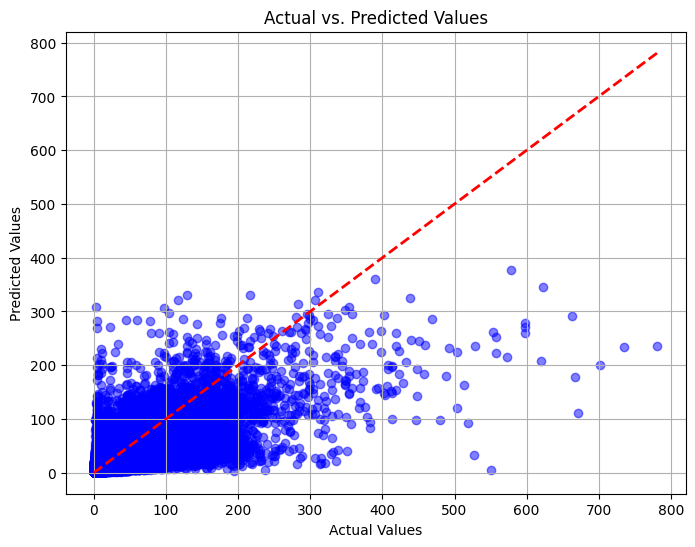

In [60]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_val, lgb_y_pred_val, c='blue', marker='o', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--', linewidth=2)

plt.grid(True)
plt.show()

### SGDRegressor

In [61]:
sgd_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('sgd', SGDRegressor(random_state=42))
    ]
)

In [62]:
sgd_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_cols',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['store_id', 'year', 'month',
                                                   'day_of_week', 'is_event']),
                                                 ('ord_col',
                                                  Pipeline(steps=[('target_encoder',
                                                                   TargetEncoder())]),
                                                  ['item_id',
                                                   'day_of_month'])])),
                ('sgd', SGDRegressor(random_state=42))])

In [63]:
sgd_y_pred_train = sgd_pipe.predict(X_train)

In [64]:
sgd_y_pred_val = sgd_pipe.predict(X_val)

In [65]:
obs = pd.DataFrame(X_train.iloc[0]).transpose()

In [66]:
pd.DataFrame(X_train.iloc[0]).transpose()

,item_id,store_id,year,month,day_of_month,day_of_week,is_event
2614875,HOBBIES_1_154,CA_4,2014,5,20,Tuesday,0


In [67]:
sgd_pipe.predict(obs)

array([0.89184582])

In [68]:
# Evaluate the model
mse = mean_squared_error(y_test, sgd_y_pred_val)
rmse = np.sqrt(mean_squared_error(y_test, sgd_y_pred_val))
r2 = r2_score(y_test, sgd_y_pred_val)

In [69]:
print(f"SGD Regression - Root Mean Squared Error: {rmse}")
print(f"SGD Regression - Mean Squared Error: {mse}")
print(f"SGD Regression - R-squared: {r2}")

SGD Regression - Root Mean Squared Error: 10.92747522526463
SGD Regression - Mean Squared Error: 119.40971479877227
SGD Regression - R-squared: 0.4142639658573716


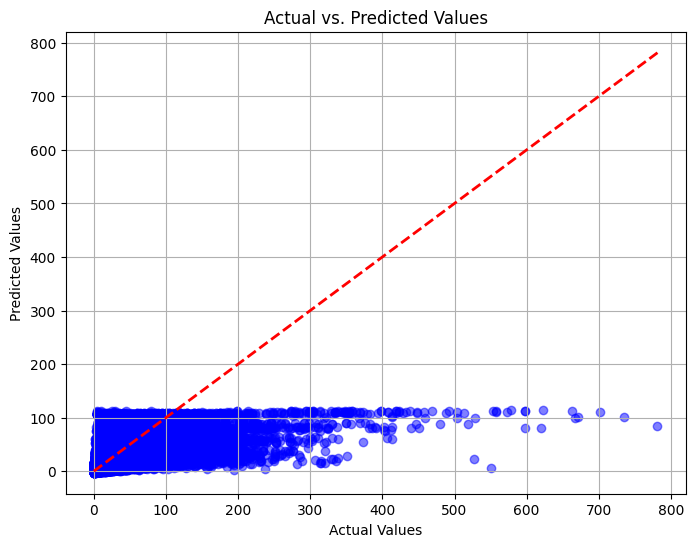

In [70]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, sgd_y_pred_test, c='blue', marker='o', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--', linewidth=2)

plt.grid(True)
plt.show()

### XGBRegressor

In [71]:
xgb_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('xgb', XGBRegressor(random_state=42))
    ]
)

In [72]:
xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_cols',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['store_id', 'year', 'month',
                                                   'day_of_week', 'is_event']),
                                                 ('ord_col',
                                                  Pipeline(steps=[('target_encoder',
                                                                   TargetEncoder())]),
                                                  ['item_id',
                                                   'day_of_month'])])),
                ('xgb',
                 XGBRegressor(base_score=None, booster=No...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [73]:
xgb_pipe.predict(X_train)

array([ 4.2829423,  4.1090226,  6.0013847, ..., 11.27383  ,  2.7112074,
        2.6512904], dtype=float32)

In [74]:
xgb_y_pred_val = xgb_pipe.predict(X_val)

In [75]:
# Evaluate the model
mse = mean_squared_error(y_test, xgb_y_pred_test)
rmse = np.sqrt(mean_squared_error(y_val, xgb_y_pred_val))
r2 = r2_score(y_test, xgb_y_pred_val)

In [76]:
print(f"XG Boost Regression - Root Mean Squared Error: {rmse}")
print(f"XG Boost Regression - Mean Squared Error: {mse}")
print(f"XG Boost Regression - R-squared: {r2}")

XG Boost Regression - Root Mean Squared Error: 9.869239655815312
XG Boost Regression - Mean Squared Error: 97.40189138391753
XG Boost Regression - R-squared: 0.5222181237653079


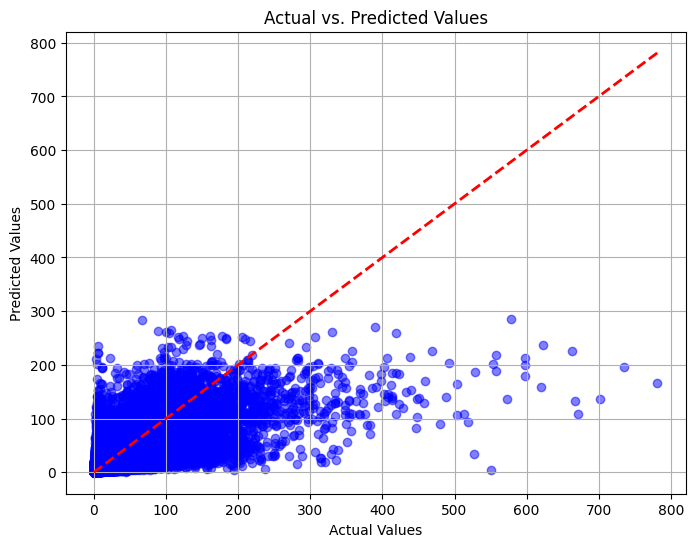

In [77]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, xgb_y_pred_test, c='blue', marker='o', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--', linewidth=2)

plt.grid(True)
plt.show()

### Random Forest Regressor

In [78]:
rf_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('rf', RandomForestRegressor(random_state=42))
    ]
)

In [79]:
rf_predictive_model = rf_pipe.fit(X_train, y_train)

In [88]:
dump(rf_predictive_model, '../../models/predictive/random_forest.joblib')

['../../models/predictive/random_forest.joblib']

In [81]:
rf_y_pred_train = rf_pipe.predict(X_train)

In [89]:
rf_y_pred_val = rf_pipe.predict(X_val)

NameError: name 'X_val' is not defined

In [83]:
rf_y_pred_val

array([ 8.5292,  9.7066, 10.8657, ...,  4.647 ,  4.0471,  3.9746])

In [84]:
# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred_val))
val_rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred_val))
r2 = r2_score(y_test, rf_y_pred_val)

In [85]:
print(f"Random Forest Regression - Root Mean Squared Error - Train: {train_rmse}")
print(f"Random Forest Regression - Root Mean Squared Error - Validation: {val_rmse}")
print(f"Random Forest Regression - R-squared: {r2}")

Random Forest Regression - Root Mean Squared Error: 8.666509186836336
Random Forest Regression - Mean Squared Error: 75.1083814855186
Random Forest Regression - R-squared: 0.6315736489586556


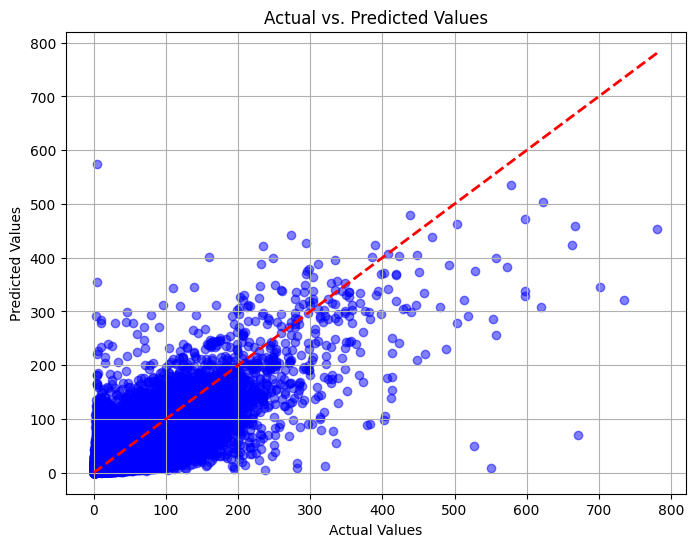

In [86]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_y_pred_test, c='blue', marker='o', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--', linewidth=2)

plt.grid(True)
plt.show()